In [1]:
import os
import glob
from sklearn import preprocessing
import sklearn as skl
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read processed data
df = pd.read_pickle(r'D:\CIC\Combined\Filter Corr Attr\cic_ids_2018_data.pkl')

In [3]:
# Here, you need to divide given columns into two types of variables dependent (or target variable) and independent variable (or feature variables)

# Drop the target value from independent variables
X = df.drop(["Label"], axis=1)

# Get just the target values
y = df["Label"]

print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"Orginal: {df.shape}")

X: (16137242, 64)
y: (16137242,)
Orginal: (16137242, 65)


In [4]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
print(f"Train Size X = {len(X_train)} | Test Size X = {len(X_test)} | Test is {len(X_test)/len(df)}% of Train")

print(f"Train Size y = {len(y_train)} | Test Size y = {len(y_test)} | Test is {len(y_test)/len(df)}% of Train")

Train Size X = 11296069 | Test Size X = 4841173 | Test is 0.30000002478738313% of Train
Train Size y = 11296069 | Test Size y = 4841173 | Test is 0.30000002478738313% of Train


Training data benign vs malicious:
0    9373579
1    1922490
Name: Label, dtype: int64


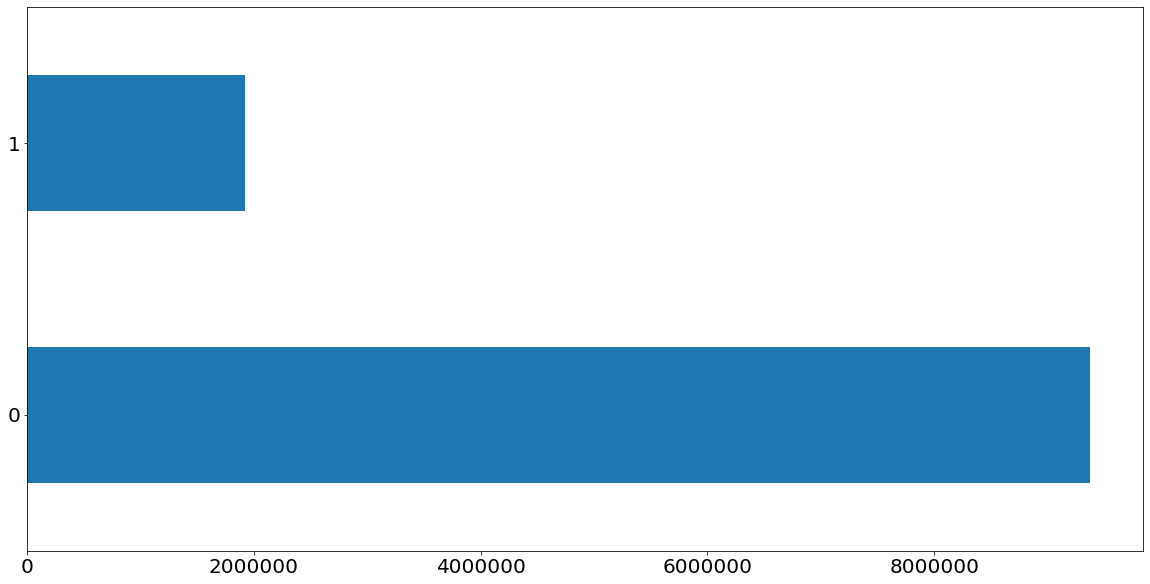

In [6]:
# The following shows the number of Benign (0) vs Malicous (1) entries
# This allows us to check if the data is uniformaly distributed
print('Training data benign vs malicious:')
print(y_train.value_counts())

train_attack_types = y_train.value_counts()
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

Test data benign vs malicious:
0    4016670
1     824503
Name: Label, dtype: int64


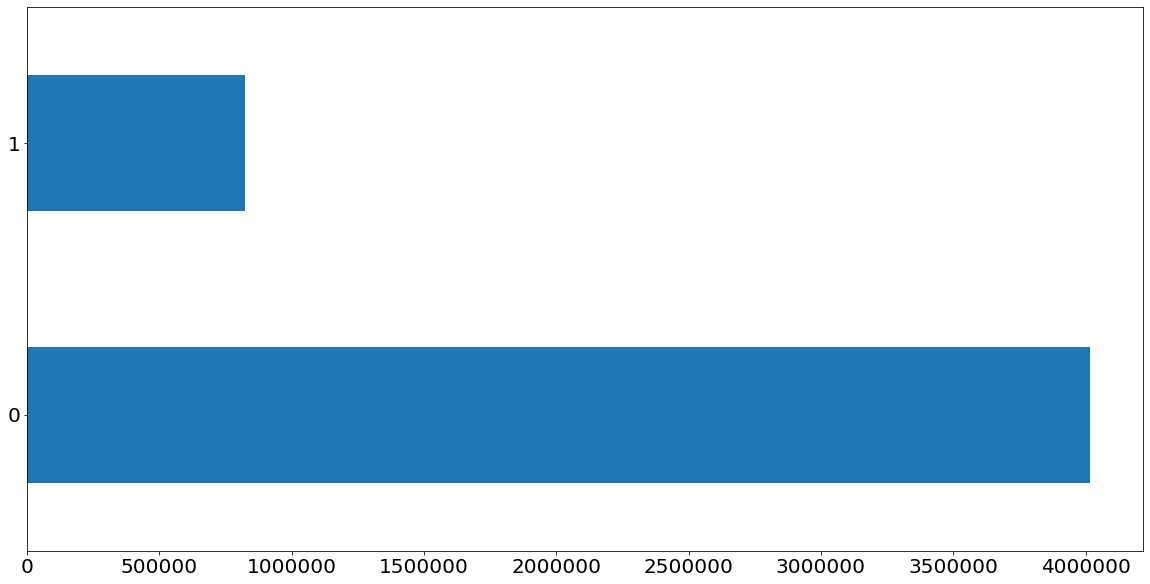

In [7]:
# The following shows the number of Benign (0) vs Malicous (1) entries
# This allows us to check if the data is uniformaly distributed
print('Test data benign vs malicious:')
print(y_test.value_counts())

train_attack_types = y_test.value_counts()
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11296069 entries, 2794206 to 318661
Data columns (total 64 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   Protocol           float64
 2   Flow Duration      float64
 3   Tot Fwd Pkts       float64
 4   Tot Bwd Pkts       float64
 5   TotLen Fwd Pkts    float64
 6   TotLen Bwd Pkts    float64
 7   Fwd Pkt Len Max    float64
 8   Fwd Pkt Len Min    float64
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    float64
 12  Bwd Pkt Len Min    float64
 13  Bwd Pkt Len Mean   float64
 14  Flow Byts/s        float64
 15  Flow Pkts/s        float64
 16  Flow IAT Mean      float64
 17  Flow IAT Std       float64
 18  Flow IAT Max       float64
 19  Flow IAT Min       float64
 20  Fwd IAT Tot        float64
 21  Fwd IAT Mean       float64
 22  Fwd IAT Std        float64
 23  Fwd IAT Max        float64
 24  Fwd IAT Min        float64
 25  Bwd IAT Tot 

In [9]:
# Create test and train files containing raw data
output_dir = r'D:\CIC\Train and Test\Filter Corr Attr'
X_train.to_pickle(f'{output_dir}\X_train.pkl')
X_test.to_pickle(f'{output_dir}\X_test.pkl')

# Create test and train files containing target values
y_test.to_pickle(f'{output_dir}\y_test.pkl')
y_train.to_pickle(f'{output_dir}\y_train.pkl')